<a href="https://colab.research.google.com/github/doji6binks/Physique-app-aux-SS/blob/main/convergences_lexico_grammaticales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I - Naming Game 


Le code suivant permet de mettre en évidence la convergence vers un vocabulaire commun d'une population à partir d'un modèle fortement inspiré du jeu de langage du Naming Game. La fonction f génère l'évolution du nombres de mots en fonction du temps dans le modèle du Naming Game. La convergence vers un vocabulaire commun  peut être caractérisée de vive, comme le montre les graphiques générés par la fonction. 

In [ ]:
import random
import matplotlib.pyplot as plt

N=1000 #Taille de la population
n=100000 #nombre de répétitions

def f(N,n):
    vocab={}
    vocab2={}
    for k in range(N):
        vocab[k]=[]
    N_tot=[0]
    N_diff=[]
    n_diff=0
    N_succ=[]
    n_succ=0
    a=0
    for k in range(n):
        speaker=random.randint(0,N-1)
        hearer=random.randint(0,N-1)
        while speaker==hearer:
            hearer=random.randint(0,N-1)
        if vocab[speaker]==[]:
            a+=1
            n_diff+=1
            N_tot.append(N_tot[-1]+1)
            word=str(a)
            vocab[speaker].append(word)
            vocab2[word]=[speaker]
        else:
            word=random.choice(vocab[speaker])
        if word in vocab[hearer]:
            n_succ+=1
            N_tot.append(N_tot[-1]-len(vocab[speaker])-len(vocab[hearer])+2)
            for mot in vocab[speaker]:
                if mot==word:
                    continue
                else:
                    if len(vocab2[mot])==1:
                        n_diff-=1
                    vocab2[mot].remove(speaker)
            for mot in vocab[hearer]:
                if mot==word:
                    continue
                else:
                    if len(vocab2[mot])==1:
                        n_diff-=1
                    vocab2[mot].remove(hearer)
            vocab[speaker]=[word]
            vocab[hearer]=[word]
        else:
            vocab[hearer].append(word)
            vocab2[word].append(hearer)
            N_tot.append(N_tot[-1]+1)
        N_succ.append(n_succ/(k+1))
        N_diff.append(n_diff)
    return N_tot,N_diff,N_succ,vocab

N_tot=[]
N_diff=[]
for i in range(1000):
  X1,X2,X3,g=f(N,n)
  N_tot.append(X1)
  N_diff.append(X2)

N_tot_moy=[0 for i in range(n)]
N_diff_moy=[0 for i in range(n)]
for i in range(1000):
  for j in range(n):
    N_tot_moy[j]+=N_tot[i][j]
    N_diff_moy[j]+=N_diff[i][j]

for i in range(n):
  N_tot_moy[i]=N_tot_moy[i]/1000
  N_diff_moy[i]=N_diff_moy[i]/1000


X1,X2,X3,g=f(N,n)
plt.plot(N_tot_moy)
plt.title("Nombre total de mots")
plt.xlabel("t")
plt.ylabel("N_tot")
plt.show()
plt.plot(N_diff_moy)
plt.title("Nombre différent de mots")
plt.xlabel("t")
plt.ylabel("N_diff")
plt.show()
# plt.plot(X3)
# plt.title("Taux de succès")
# plt.xlabel("t")
# plt.ylabel("S")
# plt.plot([3/N**2*t for t in range(n)])
# plt.show()

II- Success Rate 

Le code suivant rend compte du taux de succès caractérisé comme le nombre de communication réussie entre les deux interlocuteurs. La forme en S de la courbe résultante est compatible avec celle observée dans la diffusion d'une nouvelle convetion dans une population humaine

In [ ]:
import random
import matplotlib.pyplot as plt

N=1000 #Taille de la population
n=100000 #nombre de répétitions

def ranking(vocab2,N):
    l=[]
    for word in vocab2:
        k=len(vocab2[word])
        l.append(k)
        l.sort(reverse=True)
    for k in range(len(l)):
        l[k]=l[k]/N
    return l

def f(N,n):
    vocab={}
    vocab2={}
    for k in range(N):
        vocab[k]=[]
    N_tot=[0]
    N_diff=[]
    n_diff=0
    N_succ=[]
    n_succ=0
    a=0
    rank=[]
    test_rank=[N*2,N*4,N*6,N*8,N*10,N*11,N*15,N*20,N*30,N*45,N*60]
    for k in range(n):
        speaker=random.randint(0,N-1)
        hearer=random.randint(0,N-1)
        while speaker==hearer:
            hearer=random.randint(0,N-1)
        if vocab[speaker]==[]:
            a+=1
            n_diff+=1
            N_tot.append(N_tot[-1]+1)
            word=str(a)
            vocab[speaker].append(word)
            vocab2[word]=[speaker]
        else:
            word=random.choice(vocab[speaker])
        if word in vocab[hearer]:
            n_succ+=1
            N_tot.append(N_tot[-1]-len(vocab[speaker])-len(vocab[hearer])+2)
            for mot in vocab[speaker]:
                if mot==word:
                    continue
                else:
                    if len(vocab2[mot])==1:
                        n_diff-=1
                    vocab2[mot].remove(speaker)
            for mot in vocab[hearer]:
                if mot==word:
                    continue
                else:
                    if len(vocab2[mot])==1:
                        n_diff-=1
                    vocab2[mot].remove(hearer)
            vocab[speaker]=[word]
            vocab[hearer]=[word]
        else:
            vocab[hearer].append(word)
            vocab2[word].append(hearer)
            N_tot.append(N_tot[-1]+1)
        N_succ.append(n_succ/(k+1))
        N_diff.append(n_diff)
        if k in test_rank:
            rank.append(ranking(vocab2,N))
    return N_tot,N_diff,N_succ,vocab,rank

X1,X2,X3,g,rank=f(N,n)

for i in range(len(rank)):
    plt.plot(range(len(rank[i])),rank[i],marker='o',markersize=1)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()


In [ ]:
x=[500,675,750,1000,2000,2500,5000]
y=[0.3*e**1.5 for e in x]
rep=20
N_max=[[] for k in range(rep)]
t_max=[[] for k in range(rep)]

for k in range(rep):
    for j in x:
        X1,X2,X3,g=f(j,j*100)
        N_max[k].append(max(X1))
        t_max[k].append(X1.index(N_max[k][-1]))
N_max_moy=[]
t_max_moy=[]

for i in range(len(x)):
    acc_N=0
    acc_t=0
    for k in range(rep):
        acc_N+=N_max[k][i]
        acc_t+=t_max[k][i]
    N_max_moy.append(acc_N/rep)
    t_max_moy.append(acc_t/rep)

plt.plot(x,N_max_moy)
plt.plot(x,y)
plt.xlabel("N")
plt.ylabel("N_max")
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(x,t_max_moy)
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("N")
plt.ylabel("t(N_max)")
plt.show()

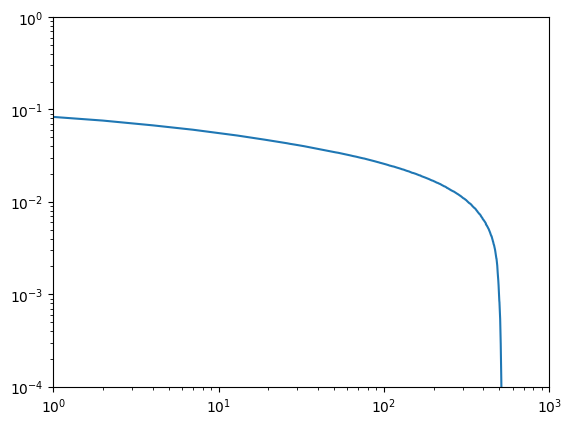

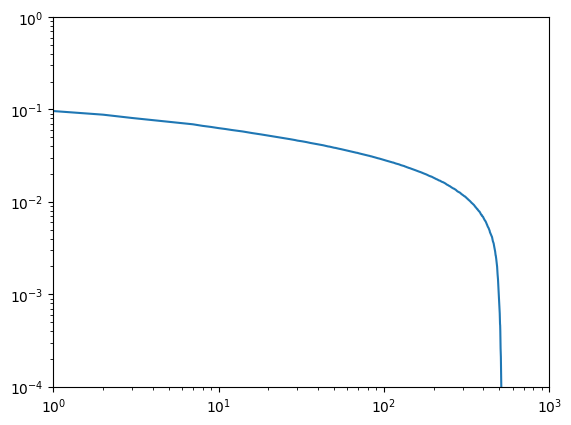

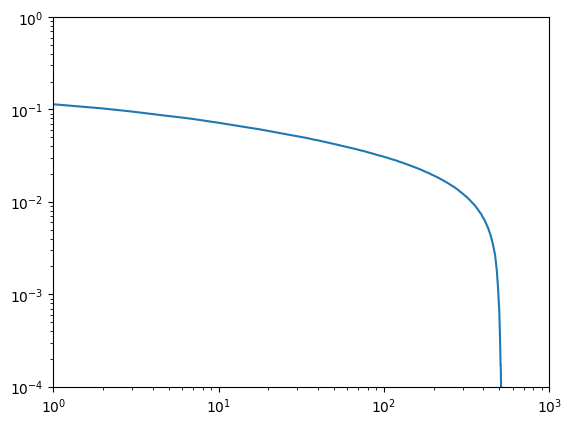

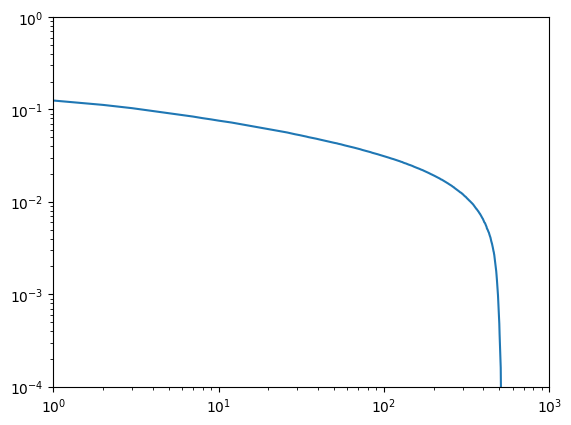

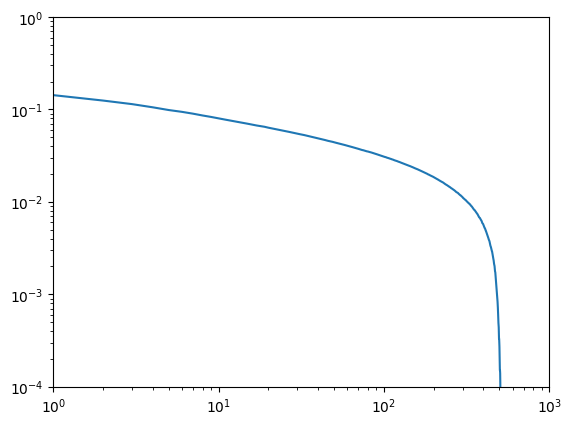

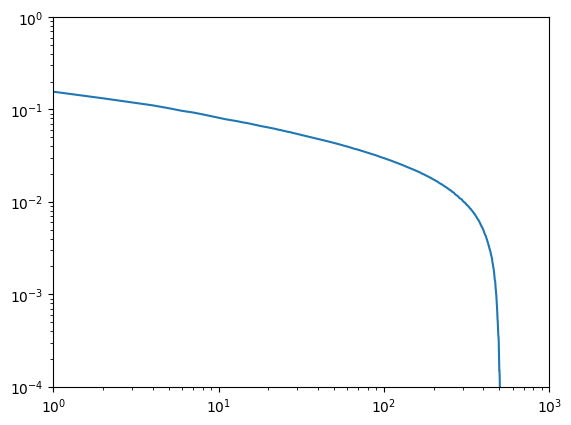

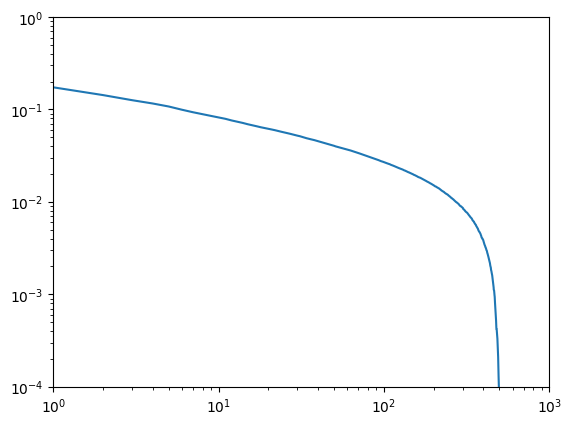

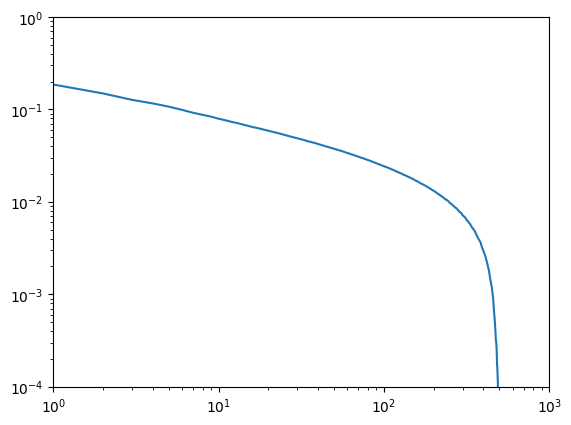

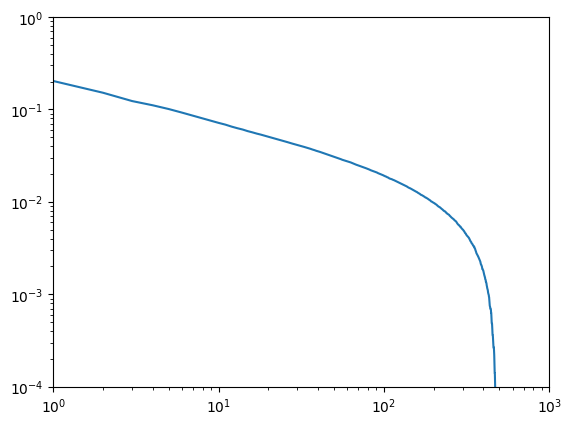

In [ ]:
import random
import matplotlib.pyplot as plt

N=1000 #Taille de la population
n=100000 #nombre de répétitions

def ranking(vocab2,N):
    l=[]
    for word in vocab2:
        k=len(vocab2[word])
        l.append(k)
        l.sort(reverse=True)
    for i in range(len(l)):
        l[i]=l[i]/N
    return l

def f(N,n):
    vocab={}
    vocab2={}
    for k in range(N):
        vocab[k]=[]
    N_tot=[0]
    N_diff=[]
    n_diff=0
    N_succ=[]
    n_succ=0
    a=0
    rank=[]
    test_rank=[N*10,N*12,N*15,N*17,N*20,N*22,N*25,N*27,N*30]
    for k in range(n):
        speaker=random.randint(0,N-1)
        hearer=random.randint(0,N-1)
        while speaker==hearer:
            hearer=random.randint(0,N-1)
        if vocab[speaker]==[]:
            a+=1
            n_diff+=1
            N_tot.append(N_tot[-1]+1)
            word=str(a)
            vocab[speaker].append(word)
            vocab2[word]=[speaker]
        else:
            word=random.choice(vocab[speaker])
        if word in vocab[hearer]:
            n_succ+=1
            N_tot.append(N_tot[-1]-len(vocab[speaker])-len(vocab[hearer])+2)
            for mot in vocab[speaker]:
                if mot==word:
                    continue
                else:
                    if len(vocab2[mot])==1:
                        n_diff-=1
                    vocab2[mot].remove(speaker)
            for mot in vocab[hearer]:
                if mot==word:
                    continue
                else:
                    if len(vocab2[mot])==1:
                        n_diff-=1
                    vocab2[mot].remove(hearer)
            vocab[speaker]=[word]
            vocab[hearer]=[word]
        else:
            vocab[hearer].append(word)
            vocab2[word].append(hearer)
            N_tot.append(N_tot[-1]+1)
        N_succ.append(n_succ/(k+1))
        N_diff.append(n_diff)
        if k in test_rank:
            rank.append(ranking(vocab2,N))
    return N_tot,N_diff,N_succ,vocab,rank

l_rank=[]
for i in range(100):
  x1,x2,x3,g,rank=f(N,n)
  l_rank.append(rank)
l_rank_moy=[[0 for k in range(1000)]for j in range(9)]
for i in range(100):
  for j in range(9):
    for k in range(len(l_rank[i][j])):
      l_rank_moy[j][k]+=l_rank[i][j][k]
for j in range(9):
  for k in range(1000):
    l_rank_moy[j][k]=l_rank_moy[j][k]/100

#affichage des graphes aux 9 instants choisis
for j in range(9):
    plt.plot(range(len(l_rank_moy[j])),l_rank_moy[j])
    plt.xscale('log')
    plt.xlim(1,1000)
    plt.ylim(0.0001,1)
    plt.yscale('log')
    plt.show()